In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
from sklearn.manifold import TSNE

from tqdm import tqdm


In [2]:
trainset = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.MNIST(root='../data', train=False, download=True, transform=transforms.ToTensor())

trainsize = int(0.8 * len(trainset))
valsize = len(trainset) - trainsize
trainset, valset = torch.utils.data.random_split(trainset, [trainsize, valsize])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=256, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False, num_workers=2)

len(trainloader), len(valloader), len(testloader)

(188, 47, 40)

In [3]:
def visualise_tsne(net, dataset, layer, dim):
    net.eval()
    X, y = [], []
    for x, _y in tqdm(dataset):
        X.append(net[:layer](x.view(1, 1, 28, 28).to(device)).detach().cpu().numpy())
        y.append(_y)
    X = np.concatenate(X, axis=0)
    y = np.array(y)
    X = TSNE(n_components=dim).fit_transform(X)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

In [4]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# Initialize the weights
for layer in net:
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform_(layer.weight)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

100%|██████████| 47/47 [00:06<00:00,  7.53it/s]


epoch: 0, train_loss: 1.8102, valid_loss: 1.2490, train_acc: 0.5351, valid_acc: 0.7625


100%|██████████| 47/47 [00:05<00:00,  8.72it/s]


epoch: 1, train_loss: 0.9194, valid_loss: 0.7050, train_acc: 0.7990, valid_acc: 0.8381


100%|██████████| 47/47 [00:05<00:00,  8.09it/s]


epoch: 2, train_loss: 0.6131, valid_loss: 0.5295, train_acc: 0.8474, valid_acc: 0.8656


100%|██████████| 47/47 [00:05<00:00,  8.40it/s]


epoch: 3, train_loss: 0.4985, valid_loss: 0.5067, train_acc: 0.8691, valid_acc: 0.8798


100%|██████████| 47/47 [00:06<00:00,  7.26it/s]


epoch: 4, train_loss: 0.4379, valid_loss: 0.4409, train_acc: 0.8806, valid_acc: 0.8871


100%|██████████| 47/47 [00:05<00:00,  8.30it/s]


epoch: 5, train_loss: 0.4001, valid_loss: 0.3935, train_acc: 0.8894, valid_acc: 0.8947


100%|██████████| 47/47 [00:05<00:00,  7.93it/s]


epoch: 6, train_loss: 0.3737, valid_loss: 0.2730, train_acc: 0.8955, valid_acc: 0.9002


100%|██████████| 47/47 [00:05<00:00,  7.99it/s]


epoch: 7, train_loss: 0.3535, valid_loss: 0.3638, train_acc: 0.9009, valid_acc: 0.9038


100%|██████████| 47/47 [00:07<00:00,  6.68it/s]


epoch: 8, train_loss: 0.3374, valid_loss: 0.3528, train_acc: 0.9043, valid_acc: 0.9068


100%|██████████| 47/47 [00:06<00:00,  7.07it/s]


epoch: 9, train_loss: 0.3241, valid_loss: 0.2333, train_acc: 0.9075, valid_acc: 0.9100


100%|██████████| 47/47 [00:05<00:00,  8.29it/s]


epoch: 10, train_loss: 0.3131, valid_loss: 0.3526, train_acc: 0.9105, valid_acc: 0.9125


100%|██████████| 47/47 [00:07<00:00,  6.68it/s]


epoch: 11, train_loss: 0.3030, valid_loss: 0.2652, train_acc: 0.9142, valid_acc: 0.9145


100%|██████████| 47/47 [00:06<00:00,  7.42it/s]


epoch: 12, train_loss: 0.2936, valid_loss: 0.4368, train_acc: 0.9160, valid_acc: 0.9173


100%|██████████| 47/47 [00:07<00:00,  5.94it/s]


epoch: 13, train_loss: 0.2857, valid_loss: 0.2304, train_acc: 0.9181, valid_acc: 0.9189


100%|██████████| 47/47 [00:06<00:00,  7.39it/s]


epoch: 14, train_loss: 0.2786, valid_loss: 0.2664, train_acc: 0.9201, valid_acc: 0.9207


100%|██████████| 47/47 [00:06<00:00,  7.32it/s]


epoch: 15, train_loss: 0.2716, valid_loss: 0.3331, train_acc: 0.9227, valid_acc: 0.9230


100%|██████████| 47/47 [00:05<00:00,  8.93it/s]


epoch: 16, train_loss: 0.2653, valid_loss: 0.2174, train_acc: 0.9245, valid_acc: 0.9247


100%|██████████| 47/47 [00:05<00:00,  8.00it/s]


epoch: 17, train_loss: 0.2591, valid_loss: 0.2656, train_acc: 0.9264, valid_acc: 0.9262


100%|██████████| 47/47 [00:06<00:00,  7.54it/s]


epoch: 18, train_loss: 0.2533, valid_loss: 0.2193, train_acc: 0.9281, valid_acc: 0.9265


100%|██████████| 47/47 [00:05<00:00,  8.48it/s]


epoch: 19, train_loss: 0.2484, valid_loss: 0.1844, train_acc: 0.9293, valid_acc: 0.9279


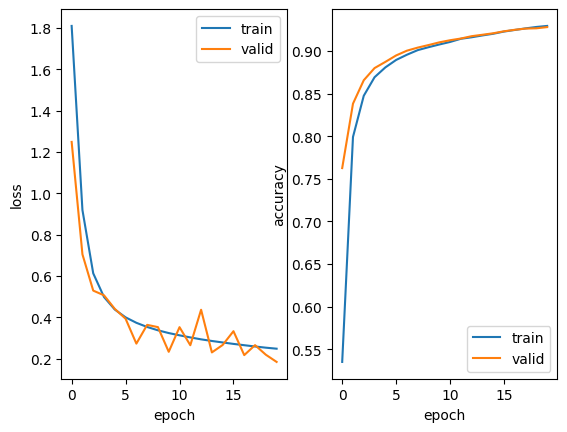

In [5]:
def train(net, train_iter, valid_iter, num_epochs, trainer, loss, device):
    train_loss, valid_loss = [], []
    train_acc, valid_acc = [], []
    for epoch in range(num_epochs):
        net.train()
        running_loss = 0.0
        acc_sum, n = 0.0, 0
        for X, y in tqdm(train_iter):
            trainer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y).mean()
            l.backward()
            trainer.step()
            running_loss += l.item()
            acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.numel()
        train_loss.append(running_loss / len(train_iter))
        train_acc.append(acc_sum / n)
        net.eval()
        acc_sum, n = 0.0, 0
        for X, y in tqdm(valid_iter):
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y).mean()
            acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.numel()
        valid_loss.append(l.item())
        valid_acc.append(acc_sum / n)

        print(
            f'epoch: {epoch}, train_loss: {train_loss[-1]:.4f}, valid_loss: {valid_loss[-1]:.4f}, train_acc: {train_acc[-1]:.4f}, valid_acc: {valid_acc[-1]:.4f}')

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train')
    plt.plot(valid_loss, label='valid')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train')
    plt.plot(valid_acc, label='valid')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = net.to(device)
# visualise_tsne(net, testset, 3, 2)
train(net, trainloader, valloader, 20, optimizer, criterion, device)

100%|██████████| 10000/10000 [00:07<00:00, 1320.41it/s]


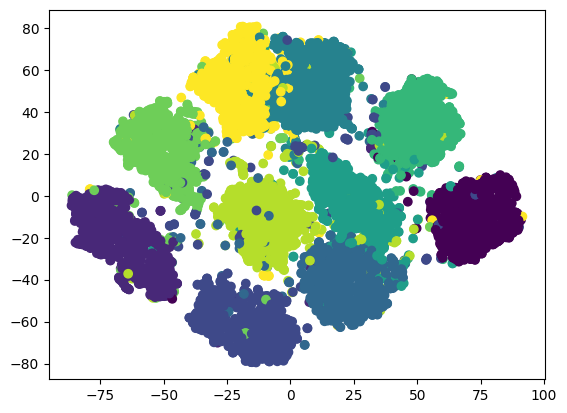

In [6]:
visualise_tsne(net, testset, -3, 2)